# Data Visualization & Story Telling
## Analysis and Improvement of Data Representations

**Course: DLBDSEDAV01 - Exploratory Data Analysis and Visualization**<br>
**Task 2: Improving a Data Visualization by Telling a Data Story**<br>

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib_venn import venn3, venn3_circles
import seaborn as sns

### Load Data Set

In [64]:
# Load games table
games = pd.read_csv('Data/games.csv')

# Convert release date to timestamp
games['date_release'] = pd.to_datetime(games['date_release'], errors='raise', format='%Y-%m-%d')

games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [65]:
# Limit data to games released in 2022 and games available for one of the OS win, mac, linux (excluding Soundtracks)
games_fil = games[(games['date_release'] >= '2022-01-01') & (games['date_release'] <= '2022-12-31')]
games_fil = games_fil[(games_fil['win'] == True) | (games_fil['mac'] == True) | (games_fil['linux'] == True)]
games_fil

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
32,1872790,Luckitown,2022-01-19,True,True,False,Very Positive,86,163,4.99,4.99,0.0,True
143,498310,RPG in a Box,2022-05-10,True,True,False,Very Positive,92,153,29.99,29.99,0.0,True
165,580640,End State,2022-12-01,True,False,False,Mostly Positive,72,80,19.99,19.99,0.0,True
199,826540,Audio Trip,2022-12-19,True,False,False,Very Positive,89,224,19.99,19.99,0.0,True
253,914890,Nine Noir Lives,2022-09-07,True,True,True,Positive,87,39,19.99,19.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50713,1953060,Time Thief,2022-05-24,True,True,True,Very Positive,97,171,0.00,0.00,0.0,True
50717,2071510,Goblin Rules Football,2022-10-20,True,True,True,Mostly Positive,72,11,0.00,0.00,0.0,True
50786,1599660,Sackboy™: A Big Adventure,2022-10-27,True,False,False,Very Positive,85,1154,60.00,0.00,0.0,True
50788,920210,LEGO® Star Wars™: The Skywalker Saga,2022-04-05,True,False,False,Very Positive,91,30937,50.00,0.00,0.0,True


In [66]:
sum(games_fil['user_reviews'])

6401600

In [67]:
# Check for duplicate game ids
games_fil[games_fil['app_id'].duplicated()]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck


In [68]:
# Check for missing values
print(games_fil.isnull().sum())

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


### Set up Visual Components

In [69]:
# determine labels
labels = games_fil['rating'].unique().tolist()
print(labels)
# order labels
ordered_labels = ['Overwhelmingly Positive',
                  'Very Positive',
                  'Positive',
                  'Mostly Positive',
                  'Mixed',
                  'Mostly Negative',
                  'Negative',
                  'Very Negative',
                  'Overwhelmingly Negative']
# meaningful abbreviations for vertical plots
short_labels = ['Overwh. Pos.',
                'Very Pos.',
                'Positive',
                'Mostly Pos.',
                'Mixed',
                'Mostly Neg.',
                'Negative',
                'Very Neg.',
                'Overwh. Neg.']


# set light theme for all visualizations
sns.set_theme(style='whitegrid', context='paper')

# From Paul Tol's color palette incandescent (for plots with ordered data from positive to negative)
colorsIn = ['#A2F49B', '#BBE463', '#D6CE04', '#E7B603', '#F19903', '#F6790B', '#F94902', '#E40616', '#A80003']
sns.color_palette(colorsIn)

['Very Positive', 'Mostly Positive', 'Positive', 'Mixed', 'Overwhelmingly Positive', 'Mostly Negative', 'Negative', 'Very Negative', 'Overwhelmingly Negative']


[(0.6352941176470588, 0.9568627450980393, 0.6078431372549019),
 (0.7333333333333333, 0.8941176470588236, 0.38823529411764707),
 (0.8392156862745098, 0.807843137254902, 0.01568627450980392),
 (0.9058823529411765, 0.7137254901960784, 0.011764705882352941),
 (0.9450980392156862, 0.6, 0.011764705882352941),
 (0.9647058823529412, 0.4745098039215686, 0.043137254901960784),
 (0.9764705882352941, 0.28627450980392155, 0.00784313725490196),
 (0.8941176470588236, 0.023529411764705882, 0.08627450980392157),
 (0.6588235294117647, 0.0, 0.011764705882352941)]

In [70]:
# from Paul Tol's muted color palette (for unordered data)
colorsUO = ['#88CCEE', '#AA4499', '#44AA99', '#DDCC77']
sns.color_palette(colorsUO)

[(0.5333333333333333, 0.8, 0.9333333333333333),
 (0.6666666666666666, 0.26666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.8666666666666667, 0.8, 0.4666666666666667)]

In [71]:
# background color grey from Paul Tol's muted color palette
sns.color_palette(['#DDDDDD'])

[(0.8666666666666667, 0.8666666666666667, 0.8666666666666667)]

[https://matplotlib.org/stable/users/explain/colors/colormaps.html#colorblindness](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colorblindness) <br>
[https://matplotlib.org/stable/users/explain/colors/colormaps.html](https://matplotlib.org/stable/users/explain/colors/colormaps.html) <br>
[https://seaborn.pydata.org/tutorial/color_palettes.html](https://seaborn.pydata.org/tutorial/color_palettes.html) <br>
[https://seaborn.pydata.org/generated/seaborn.mpl_palette.html](https://seaborn.pydata.org/generated/seaborn.mpl_palette.html) <br>
[https://cran.r-project.org/web/packages/khroma/vignettes/tol.html](https://cran.r-project.org/web/packages/khroma/vignettes/tol.html)

### Overview of OS Availability of Games

In [72]:
# prepare df for venn diagram
win_ex = sum(((games_fil['win'] == True) & (games_fil['mac'] == False) & (games_fil['linux'] == False)))
mac_ex = sum(((games_fil['win'] == False) & (games_fil['mac'] == True) & (games_fil['linux'] == False)))
lin_ex = sum(((games_fil['win'] == False) & (games_fil['mac'] == False) & (games_fil['linux'] == True)))
win_mac = sum(((games_fil['win'] == True) & (games_fil['mac'] == True) & (games_fil['linux'] == False)))
win_lin = sum(((games_fil['win'] == True) & (games_fil['mac'] == False) & (games_fil['linux'] == True)))
mac_lin = sum(((games_fil['win'] == False) & (games_fil['mac'] == True) & (games_fil['linux'] == True)))
all_os = sum(((games_fil['win'] == True) & (games_fil['mac'] == True) & (games_fil['linux'] == True)))

venn_count = pd.DataFrame({'Operating System': ['Win_Ex', 'Mac_Ex', 'Lin_Ex', 'Win_Mac', 'Win_Lin', 'Mac_Lin', 'All'],
                          'No. Games': [win_ex, mac_ex, lin_ex, win_mac, win_lin, mac_lin, all_os]})

venn_count

,Operating System,No. Games
0,Win_Ex,5721
1,Mac_Ex,0
2,Lin_Ex,0
3,Win_Mac,570
4,Win_Lin,248
5,Mac_Lin,0
6,All,646


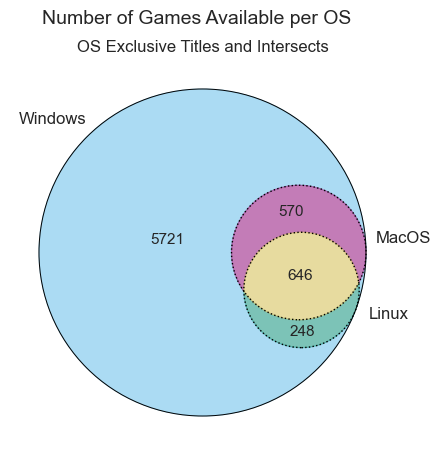

In [73]:
venn_diag, ax = plt.subplots(figsize=(5,5))
plt.suptitle('Number of Games Available per OS', size=14)
plt.title('OS Exclusive Titles and Intersects', size=12)
venn = venn3(subsets=(5721, 0, 570, 0, 248, 0, 646), set_labels=('Windows', 'MacOS', 'Linux'), alpha=0.7)
circle = venn3_circles(subsets=(5721, 0, 570, 0, 248, 0, 646), linewidth=0.7)
circle[1].set_linestyle('dotted')
circle[1].set_lw(1)
circle[2].set_linestyle('dotted')
circle[2].set_lw(1)

# customize color
venn.get_patch_by_id("100").set_color("#88CCEE")
venn.get_patch_by_id("110").set_color("#AA4499")
venn.get_patch_by_id("101").set_color("#44AA99")
venn.get_patch_by_id("111").set_color("#DDCC77")

# adjust label position
lbl = venn.get_label_by_id('A')
x, y = lbl.get_position()
lbl.set_position((x-0.12, y-0.12))

lbl = venn.get_label_by_id('B')
x, y = lbl.get_position()
lbl.set_position((x+0.15, y-0.2))

lbl = venn.get_label_by_id('C')
x, y = lbl.get_position()
lbl.set_position((x+0.3, y+0.16))

# adjust label text size
for text in venn.set_labels:
    text.set_fontsize(12)
    
for text in venn.subset_labels:
    try:
        text.set_fontsize(11)
    except AttributeError:
        continue

plt.show()

fig = venn_diag.get_figure()
fig.savefig('venn.png')

### Overview of Games per Rating Category

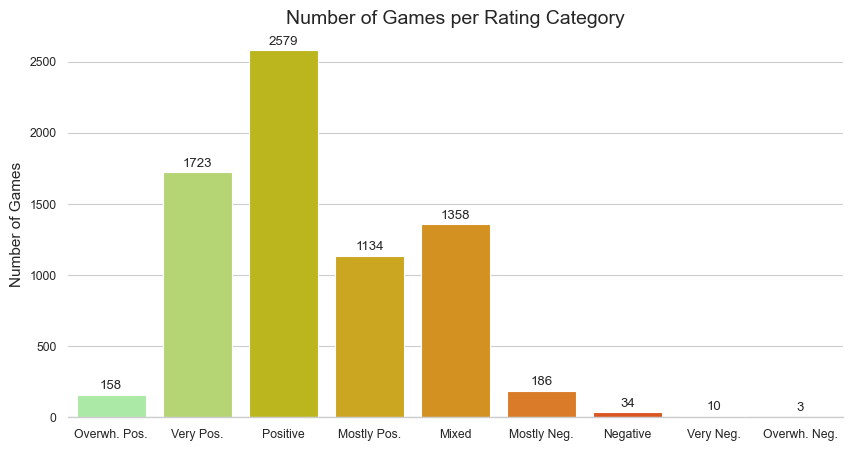

In [74]:
countplt, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=games_fil, x='rating', order=ordered_labels, palette=colorsIn)
ax.set_title('Number of Games per Rating Category', size=14)
ax.set_xlabel(None)
ax.set_ylabel('Number of Games', size=11)
ax.set_xticklabels(labels=short_labels)

for rect in ax.patches:
    ax.text(x=rect.get_x()+rect.get_width()/2, y=rect.get_height()+40, s=int(rect.get_height()), horizontalalignment='center')

sns.despine(left=True)
plt.show()

fig = countplt.get_figure()
fig.savefig('bar_all.png')

### Comparing Game Ratings per Category by OS Availability

In [75]:
#create df suitable for grouped seaborn bar plots with abs and rel number of games per os
count_rat = pd.DataFrame()
count_rat['win_ex'] = games_fil['rating'][((games_fil['win'] == True) & (games_fil['mac'] == False) & (games_fil['linux'] == False))].value_counts()
count_rat['win_mac'] = games_fil['rating'][((games_fil['win'] == True) & (games_fil['mac'] == True) & (games_fil['linux'] == False))].value_counts()
count_rat['win_lin'] = games_fil['rating'][((games_fil['win'] == True) & (games_fil['mac'] == False) & (games_fil['linux'] == True))].value_counts()
count_rat['all'] = games_fil['rating'][((games_fil['win'] == True) & (games_fil['mac'] == True) & (games_fil['linux'] == True))].value_counts()
count_rat = count_rat.fillna(0)
count_rat[['win_mac', 'win_lin', 'all']] = count_rat[['win_mac', 'win_lin', 'all']].astype(int)

count_rat = count_rat.transpose().melt(ignore_index=False)
count_rat['os'] = count_rat.index

count_rat

,rating,value,os
win_ex,Positive,2039,win_ex
win_mac,Positive,200,win_mac
win_lin,Positive,118,win_lin
all,Positive,222,all
win_ex,Very Positive,1277,win_ex
win_mac,Very Positive,181,win_mac
win_lin,Very Positive,68,win_lin
all,Very Positive,197,all
win_ex,Mixed,1161,win_ex
win_mac,Mixed,76,win_mac


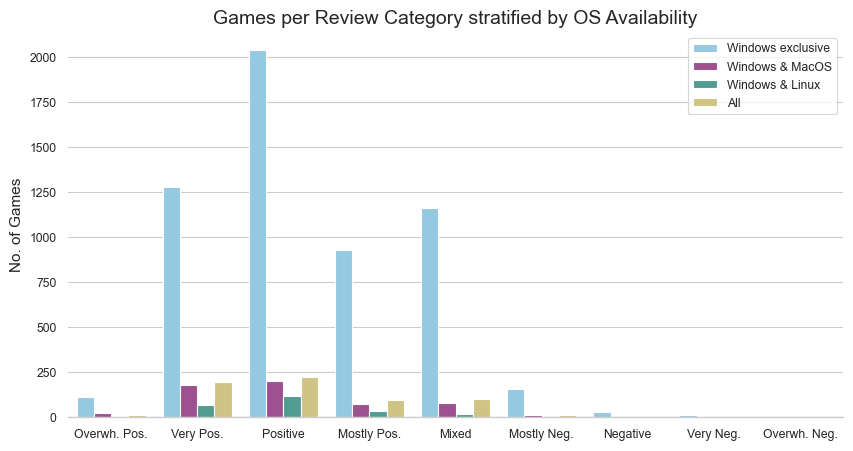

In [76]:
barplt, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=count_rat, x='rating', y='value', hue='os', palette=colorsUO, order=ordered_labels, errorbar=None)
plt.legend(loc='upper right', labels=['Windows exclusive', 'Windows & MacOS', 'Windows & Linux', 'All'])
ax.set_title('Games per Review Category stratified by OS Availability', size=14)
ax.set_xlabel(None)
ax.set_ylabel('No. of Games', size=11)
ax.set_xticklabels(labels=short_labels)

sns.despine(left=True)
plt.show()

fig = barplt.get_figure()
fig.savefig('bar_grouped_strat.png')

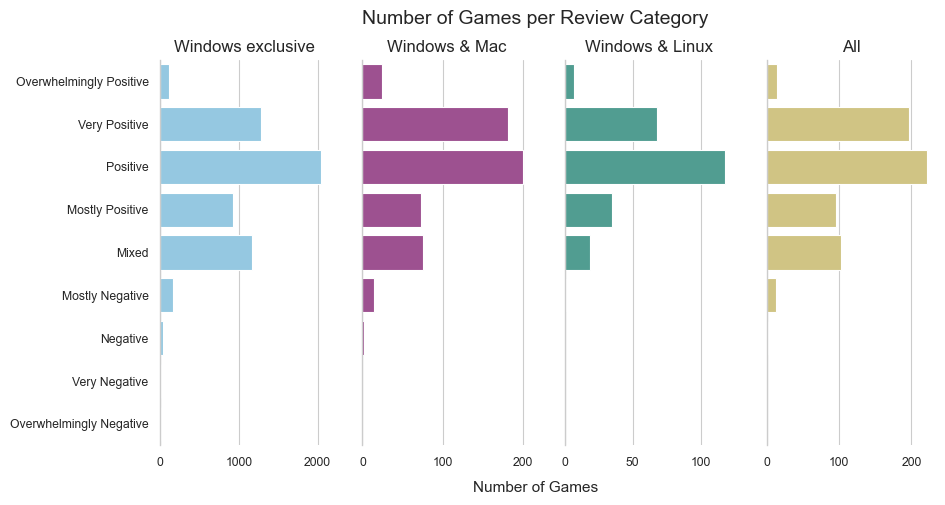

In [77]:
barsplt, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(10, 5))
barsplt.suptitle('Number of Games per Review Category', size=14)
barsplt.supxlabel('Number of Games', size=11)

sns.barplot(ax=axes[0], data=count_rat[count_rat['os']=='win_ex'], x='value', y='rating', order=ordered_labels, color='#88CCEE')
sns.barplot(ax=axes[1], data=count_rat[count_rat['os']=='win_mac'], x='value', y='rating', order=ordered_labels, color='#AA4499')
sns.barplot(ax=axes[2], data=count_rat[count_rat['os']=='win_lin'], x='value', y='rating', order=ordered_labels, color='#44AA99')
sns.barplot(ax=axes[3], data=count_rat[count_rat['os']=='all'], x='value', y='rating', order=ordered_labels, color='#DDCC77')

axes[0].set_title('Windows exclusive', size=12)
axes[1].set_title('Windows & Mac', size=12)
axes[2].set_title('Windows & Linux', size=12)
axes[3].set_title('All', size=12)

axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)
axes[3].set_ylabel(None)

axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[2].set_xlabel(None)
axes[3].set_xlabel(None)

sns.despine(bottom=True)
plt.show()

fig = barsplt.get_figure()
fig.savefig('bar_horiz_strat.png')

### Distribution of Game Prices per Rating Category

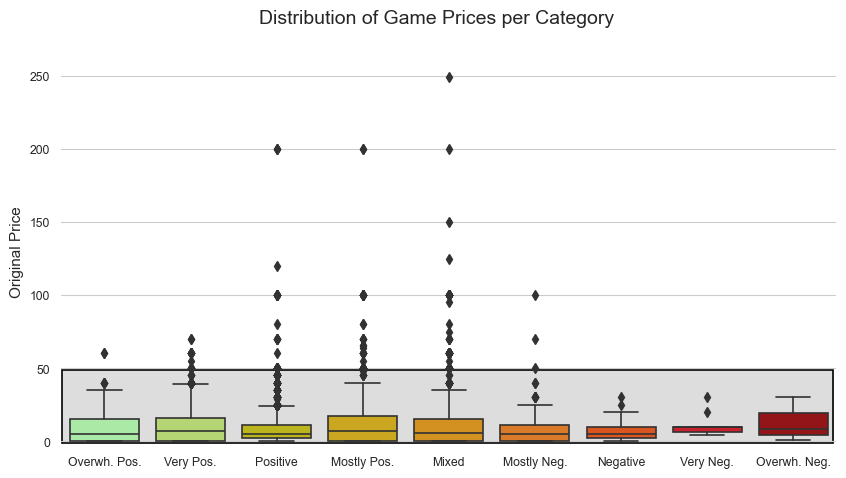

In [78]:
# boxplot for original price across categories
boxplt, ax = plt.subplots(figsize=(10, 5))
boxplt.suptitle('Distribution of Game Prices per Category', size=14)
ax = sns.boxplot(data=games_fil, x='rating', y='price_original', palette=colorsIn, order=ordered_labels)
ax.set_xticklabels(labels=short_labels)
ax.set_xlabel(None)
ax.set_ylabel('Original Price', size=11)
ax.set_ylim(-2, )
ax.add_patch(Rectangle((-0.49, -1.5), 8.95, 50, edgecolor='black', fill=True, facecolor='#DDDDDD', lw=1.2, zorder=0))

sns.despine(bottom=True, left=True)
plt.show()

fig = boxplt.get_figure()
fig.savefig('box_all.png')

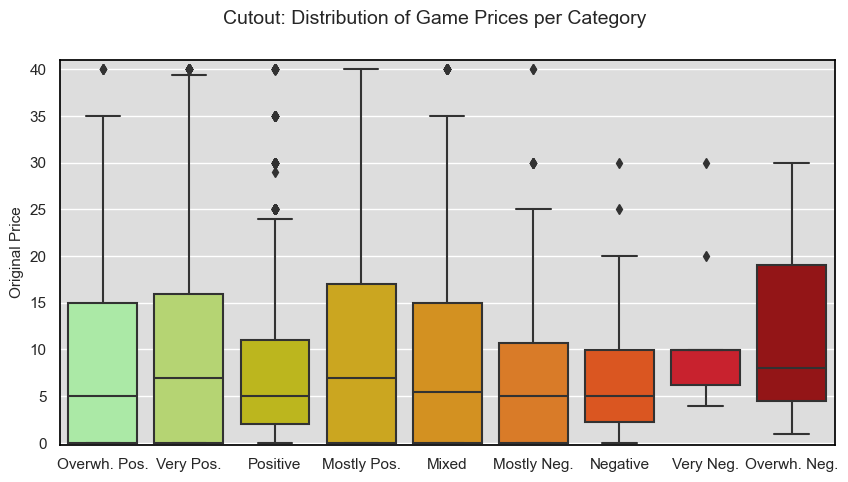

In [79]:
# boxplot for original price across categories
sns.set(rc={'axes.facecolor':'#DDDDDD', 'axes.edgecolor': 'black'})
boxplt, ax = plt.subplots(figsize=(10, 5))
boxplt.suptitle('Cutout: Distribution of Game Prices per Category', size=14)
ax = sns.boxplot(data=games_fil, x='rating', y='price_original', palette=colorsIn, order=ordered_labels)
ax.set_xticklabels(labels=short_labels)
ax.set_xlabel(None)
ax.set_ylabel('Original Price', size=11)
ax.set_ylim(-0.2, 41)

plt.show()

fig = boxplt.get_figure()
fig.savefig('box_cutout.png')